# Imports

In [ ]:
from pathlib import Path
import sys
import joblib
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

ROOT_PATH = Path().resolve().parent
sys.path.append(str(ROOT_PATH))

from src.utils.config import (
    SAVE_PATH
)

from src.utils.config import auto_config_from_data
# auto_config_from_data(X, CONFIG_PATH)

# Load data
data = joblib.load(SAVE_PATH / "data.pkl")

X = data["X"]
y = data["y"]
X_train = data["X_train"]
y_train = data["y_train"]

# Visualizations
from src.utils.eda import (
    plot_bar,
    plot_box,
    plot_histogram,
    plot_line,
    plot_pie,
    plot_scatter,
)

from src.utils.config import (
    drop_features,
    label,
    value_mappings
)

from src.utils.modeling import prepare_data
from src.utils.preprocessing import show_categorical_uniques, show_missing_data

X_train_preprocessed, _ = prepare_data(X_train, None, y_train)

# Rename columns for EDA
X_train_preprocessed.columns = X_train_preprocessed.columns.str.replace("remainder__", "pass__", regex=False)

# EDA

In [2]:
X_train_preprocessed.head(10)

,freq__NAME_HOUSING_TYPE,freq__AMT_REQ_CREDIT_BUREAU_YEAR,targ__OCCUPATION_TYPE,targ__ORGANIZATION_TYPE,pass__CODE_GENDER,pass__FLAG_OWN_CAR,pass__AMT_INCOME_TOTAL,pass__AMT_CREDIT,pass__AMT_ANNUITY,pass__REGION_POPULATION_RELATIVE,pass__DAYS_BIRTH,pass__DAYS_EMPLOYED,pass__DAYS_REGISTRATION,pass__DAYS_ID_PUBLISH,pass__FLAG_WORK_PHONE,pass__CNT_FAM_MEMBERS,pass__REGION_RATING_CLIENT,pass__EXT_SOURCE_1,pass__EXT_SOURCE_2,pass__EXT_SOURCE_3,pass__DAYS_LAST_PHONE_CHANGE,pass__FLAG_DOCUMENT_3,pass__HOUR_APPR_PROCESS_START,pass__OWN_CAR_AGE,pass__APARTMENTS_AVG,pass__CREDIT_CLOSED_CNT,pass__CREDIT_ACTIVE_CNT,pass__DAYS_CREDIT_MEAN,pass__DAYS_CREDIT_ENDDATE_MEAN,pass__AMT_CREDIT_SUM_MEAN,pass__AMT_CREDIT_SUM_DEBT_MEAN,pass__AMT_CREDIT_SUM_LIMIT_MEAN,pass__DAYS_CREDIT_UPDATE_MEAN,pass__OLDEST_BALANCE_MONTH_MEAN,pass__AMT_DOWN_PAYMENT_MEAN,pass__CNT_CONTSTATUS_APPROVED,pass__CNT_CONTSTATUS_REFUSED,pass__CNT_CONTSTATUS_CANCELED,pass__CNT_REPEAT_CLIENT,pass__YIELD_SCORE_MEAN,pass__INSURED_MEAN,pass__NAME_FAMILY_STATUS_Married,pass__ANY_DOC_FLAGGED,pass__HEAVILY_OVERFINANCED,pass__EXPECTED_TERM
0,0.887707,1.000000,0.105221,0.086347,1,0,90000.0,227520.0,13189.5,0.008230,-12298,-946,-6378.0,-4670,0,4.0,2,0.384582,0.289573,0.622922,0.0,1,10,12.057363,0.2227,3.0,2.0,-1175.800000,1633.600000,113580.000000,48879.000000,0.000000,-584.400000,-1.000000,2826.000,5.0,0.0,0.0,4.0,2.800000,0.200000,True,False,True,17.250085
1,0.887707,1.897469,0.112618,0.074923,0,1,90000.0,161730.0,13095.0,0.003069,-15375,-92,-1292.0,-1994,0,2.0,3,0.501650,0.514261,0.510871,-509.0,1,13,23.000000,0.0000,-1.0,-1.0,-1083.323414,653.101294,377582.112649,160631.548753,5871.800661,-546.682481,-1.000000,3792.375,4.0,1.0,1.0,5.0,2.333333,0.250000,True,False,True,12.350515
2,0.887707,2.000000,0.105221,0.092733,0,0,135000.0,728847.0,26307.0,0.020713,-19307,-1646,-7951.0,-2842,0,1.0,3,0.501650,0.486906,0.598926,-1474.0,1,5,12.057363,0.1485,2.0,2.0,-1358.500000,-588.666667,274812.750000,126229.500000,0.000000,-443.500000,-1.000000,4905.000,1.0,0.0,0.0,1.0,4.000000,1.000000,False,False,True,27.705440
3,0.887707,4.000000,0.105221,0.092733,0,0,135000.0,474183.0,34636.5,0.011703,-17791,-1651,-1033.0,-1345,0,1.0,2,0.501650,0.675705,0.454321,-2016.0,1,10,12.057363,0.0082,3.0,0.0,-2005.333333,-1213.333333,399285.000000,0.000000,0.000000,-162.333333,-65.666667,3600.000,6.0,2.0,0.0,7.0,3.000000,0.600000,False,False,True,13.690269
4,0.887707,1.897469,0.046311,0.116470,1,0,180000.0,254700.0,27558.0,0.006629,-8486,-977,-2873.0,-852,0,1.0,2,0.501650,0.154565,0.510871,-695.0,1,5,12.057363,0.0000,-1.0,-1.0,-1083.323414,653.101294,377582.112649,160631.548753,5871.800661,-546.682481,-1.000000,2808.000,1.0,1.0,0.0,1.0,2.000000,0.000000,False,False,True,9.242325
5,0.887707,2.000000,0.064921,0.053690,1,0,74250.0,225000.0,11250.0,0.031329,-22373,365243,-10391.0,-4138,0,2.0,2,0.501650,0.627827,0.643026,-399.0,0,13,12.057363,0.1979,4.0,3.0,-1779.285714,3830.285714,154450.285714,18090.000000,43036.587000,-818.000000,-1.000000,1107.000,2.0,1.0,1.0,3.0,1.500000,0.000000,True,False,False,20.000000
6,0.887707,0.000000,0.112618,0.157534,0,1,157500.0,360000.0,13842.0,0.019689,-14763,-2285,-756.0,-4328,0,3.0,2,0.501650,0.641732,0.263647,-429.0,1,15,4.000000,0.0804,0.0,2.0,-355.500000,940.000000,146250.000000,8968.500000,0.000000,-266.000000,-1.000000,4495.500,1.0,0.0,0.0,0.0,4.000000,0.000000,False,True,False,26.007802
7,0.887707,1.897469,0.095992,0.102119,1,0,202500.0,1350189.0,39609.0,0.018634,-13257,-1432,-11130.0,-4177,0,3.0,2,0.559719,0.548786,0.510871,-136.0,1,16,12.057363,0.0000,-1.0,-1.0,-1083.323414,653.101294,377582.112649,160631.548753,5871.800661,-546.682481,-1.000000,0.000,4.0,1.0,3.0,7.0,1.000000,0.250000,True,False,True,34.087935
8,0.887707,0.000000,0.095992,0.074923,1,0,81000.0,225000.0,10953.0,0.026392,-9940,-1380,-1478.0,-2614,1,3.0,2,0.158960,0.639925,0.438281,-648.0,1,15,12.057363,0.1433,6.0,2.0,-831.875000,-456.000000,122141.812500,9060.922500,0.000000,-583.250000,-27.125000,0.000,1.0,0.0

In [3]:
show_missing_data(X_train_preprocessed)

No missing data found!


In [4]:
# plot_pie(X_train_preprocessed, 'Feature', 'Title')
# plot_histogram(X_train_preprocessed, 'Feature', 'Title', 'xLabel', 'yLabel', bins=10)
# plot_bar(X_train_preprocessed, 'Feature', 'Title', 'xLabel', 'yLabel')
# plot_line(X_train_preprocessed, 'xColumn', 'yColumn', 'Title', 'xLabel', 'yLabel')
# plot_box(X_train_preprocessed, 'Feature', 'catColumn', 'Title', 'xLabel', 'yLabel')
# plot_scatter(X_train_preprocessed, 'xColumn', 'yColumn', 'Title', 'xLabel', 'yLabel')
# X_train_preprocessed['Feature'].value_counts()

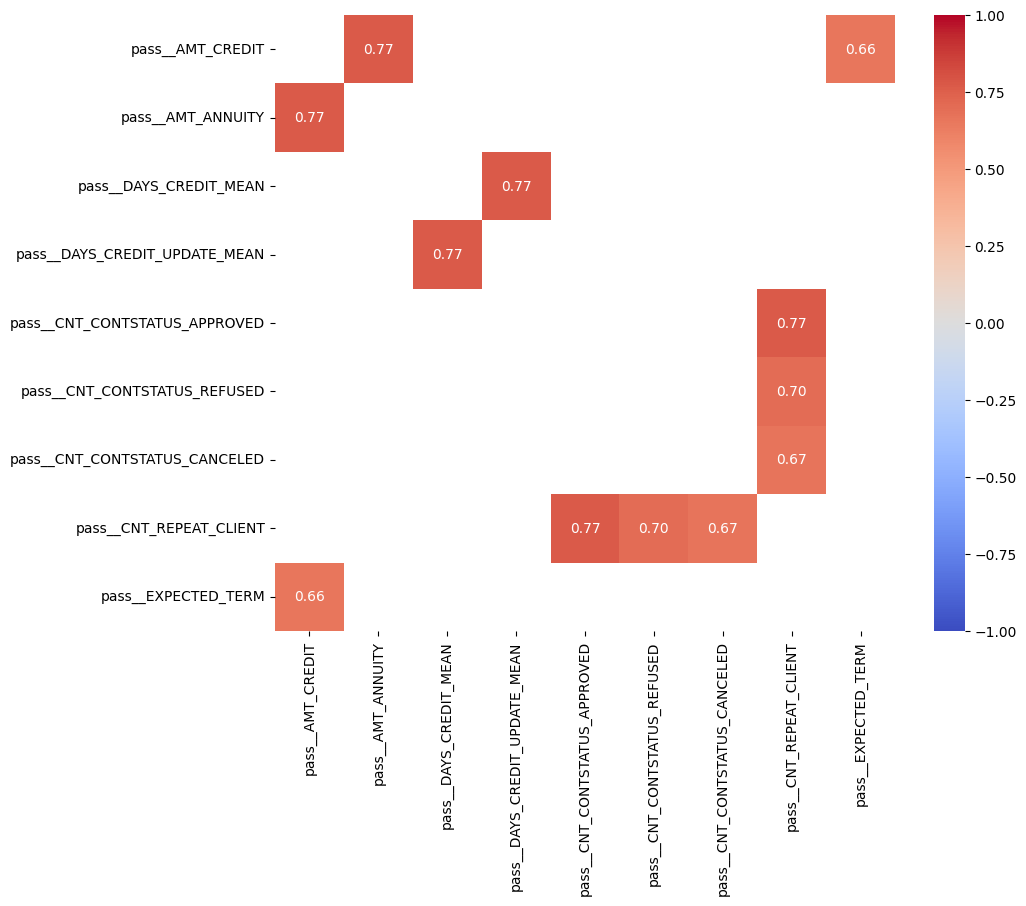

In [5]:
# Compute absolute correlation matrix
corr_matrix = X_train_preprocessed.corr()

# Remove weak correlations and self-correlations
filtered_corr = corr_matrix.where((corr_matrix.abs() > 0.65) & (corr_matrix.abs() < 1.0)).dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()